# Navigating Jupyter Notebook
A Jupyter notebook is made of cells that can contain either markdown text or executable code. In this lab, markdown cells are used for instructions, while code cells contain Python code.

To run the code in a code cell, first choose the cell to select it. Then, either choose the play button in the toolbar or press **Shift+Enter**. You will see a set of empty square brackets [ ] to the left of each code cell. When the code is running, an asterisk will appear inside the square brackets [*]. When the code completes, the square brackets will contain a number, and any results will be displayed beneath the code cell. This number will increase with each cell you run. You can use this to see the order the cells were run in. The data cells in this notebook must be run in order, but you can run a cell multiple times. Make sure to run the cells in order from top to bottom to avoid errors. This allows you to step through the analysis one cell at a time.

# Overview
In the following tasks, you will use the Amazon Bedrock Runtime service to generate text and images using the Amazon Nova Lite and Nova Canvas models. You will invoke these models with specific prompts and configurations. You will process the generated content, which can be text or base64-encoded images. Additionally, you will perform tasks such as uploading the generated images to an Amazon S3 bucket, retrieving them from the bucket, and displaying them using the Python Imaging Library (PIL). This functionality is valuable for validating the quality and capabilities of models. It can also enable further processing or decision-making based on the generated content.

# Task 1: Create a question answering function using the Amazon Bedrock API

In this task, you will create an Amazon Bedrock text prompt function that can invoke any Amazon Bedrock text foundation model (FM) for use in different applications. The function will be used throughout AnyCompany’s code base, so it must be sufficiently parameterized. The AnyCompany team does not want to be required to connect to the Amazon Bedrock console text or chat playground in order to use the large language model (LLM). For this project, you decided to author the proof-of-concept code in a Jupyter notebook. 

### Task 1.1: Create a bedrock-runtime AWS SDK for Python (Boto3) client

You will start by updating a code block to define the client and save it to a variable, and import the necessary Python libraries and modules that will be used.

Here is a list of requisites for the code block that you will create.

- **Import necessary modules:** The code requires three Python modules: boto3, json, and botocore.exceptions. Import these modules at the beginning of the code block.

- **Import specific exceptions:** Import specific exceptions from the botocore.exceptions module: ClientError, NoCredentialsError, and PartialCredentialsError. Import these exceptions along with the module.

- **Create an Amazon Bedrock client:** To do this, use the boto3 library, which is a Python SDK for AWS.

- **Use the boto3.client method:** Use the boto3.client method to create a client object for the Amazon Bedrock Runtime service. This method takes the service name as an argument, which in this case is 'bedrock-runtime'.

- **Assign the client to a variable:** Assign the client object returned by boto3.client to a variable named *bedrock_client*.

Refer to the following documentation for further guidance: https://boto3.amazonaws.com/v1/documentation/api/latest/reference/services/bedrock-runtime.html.

In [1]:
import boto3
import json
from botocore.exceptions import ClientError, NoCredentialsError, PartialCredentialsError

bedrock_client = boto3.client('bedrock-runtime')

<details>
    <summary>Task 1.1 solution</summary>

```python

import boto3
import json
from botocore.exceptions import ClientError, NoCredentialsError, PartialCredentialsError

bedrock_client = boto3.client('bedrock-runtime')
```

</details>

### Task 1.2: Create the **bedrock_text_prompt** function

The `bedrock_text_prompt` function will prepare a request payload with the provided prompt and configuration settings. It will invoke a specified Amazon Bedrock model using the AWS Bedrock client, process the model's response, and return the response as a Python object. If any errors occur during the process, an error message will be printed, and None will be returned.

Here is a list of requisites for the code block that you will create.

- **Define the function:** Start by defining a Python function named *bedrock_text_prompt* that takes three arguments: textGenerationConfig, prompt, and modelId. This function will invoke an Amazon Bedrock model with the provided configurations and prompt, and return the model's response.

- **Create a request dictionary:** Inside the function, create a dictionary called *native_request* that will hold the input data for the Amazon Bedrock model. This dictionary should have two keys: "inputText" and "textGenerationConfig". The value for "inputText" should be the prompt argument, and the value for "textGenerationConfig" should be the textGenerationConfig argument.

- **Convert the request to JSON:** Use the `json.dumps` function to convert the native_request dictionary into a JSON string. Assign the result to a variable called *request*.

- **Invoke the Amazon Bedrock model:** You must use the `bedrock_client` object (which should be defined elsewhere in the code) to invoke the Amazon Bedrock model. Call the `invoke_model` method on `bedrock_client`, passing in the modelId argument as the modelId parameter, and the request variable (containing the JSON-encoded request) as the body parameter. Assign the response from `invoke_model` to a variable called *modelResponse*.

- **Process the model response:** Inside a try block, complete the following:

    - Use `json.loads` to decode the response body (modelResponse["body"].read()) into a Python dictionary or object. Assign the result to a variable called *model_response*.
    - Return the `model_response` variable.

- **Handle exceptions:** Inside the except block, catch any ClientError or Exception that might occur during the model invocation or response processing. Print an error message that includes the modelId and the error message from the exception, and return None.

In [2]:
import boto3
import json
from botocore.exceptions import ClientError, NoCredentialsError, PartialCredentialsError

bedrock_client = boto3.client('bedrock-runtime')

def bedrock_text_prompt(textGenerationConfig, prompt, modelId):
    native_request = {
        "messages": [
            {
                "role": "user",
                "content": [{"text": prompt}]
            }
        ],
        "inferenceConfig": textGenerationConfig
    }
    
    try:
        request = json.dumps(native_request)
        modelResponse = bedrock_client.invoke_model(modelId=modelId, body=request)
        model_response = json.loads(modelResponse["body"].read())
        return model_response
    except (ClientError, Exception) as e:
        print(f"ERROR: Can't invoke '{modelId}'. Reason: {e}")
        return None


<details>
    <summary>Task 1.2 solution</summary>

```python

def bedrock_text_prompt(textGenerationConfig, prompt, modelId):
    native_request = {
        "messages": [
            {
                "role": "user",
                "content": [{"text": prompt}]
            }
        ],
        "inferenceConfig": textGenerationConfig
    }
    
    try:
        request = json.dumps(native_request)
        modelResponse = bedrock_client.invoke_model(modelId=modelId, body=request)
        model_response = json.loads(modelResponse["body"].read())
        return model_response
    except (ClientError, Exception) as e:
        print(f"ERROR: Can't invoke '{modelId}'. Reason: {e}")
        return None
```

</details>

<details>
    <summary>Task 1.2 summary of the solution code</summary>

The `bedrock_text_prompt` function encapsulates the logic for invoking an Amazon Bedrock Runtime model for text generation. It takes a text prompt, text generation configuration, and the model ID as inputs; sends a request to the Amazon Bedrock Runtime service; and returns the generated text response. The function also handles exceptions and errors that might occur during the model invocation process.

</details>

### Task 1.3: Add input parameters for invoking the Amazon Bedrock model

You will now add three variables to your code that will be used as input parameters for invoking an Amazon Bedrock model to generate text based on the given prompt.

Here is a list of requisites for the code block that you will create.

1. Create a dictionary for text generation configuration settings with the following three key-value pairs:

    - "maxTokenCount": An integer for the maximum number of tokens to generate (for example, 512)
    - "temperature": A float between 0.0 and 1.0 for controlling output randomness/creativity (for example, 0.5)
    - "topP": A float between 0.0 and 1.0 for the top-p sampling technique (for example, 0.9)
    
2. Create a string variable for the model ID, and assign it the value "amazon.titan-text-express-v1".

3. Create another string variable for the input prompt, and assign it the desired prompt of `Tell me an interesting fact.`

4. Add a response statement to print the output of the function.  

Refer to the following documentation for further guidance: https://docs.aws.amazon.com/bedrock/latest/userguide/model-parameters-titan-text.html#model-parameters-titan-request-response

In [3]:
textGenerationConfig = {
    "maxTokens": 512,
    "temperature": 0.5,
    "topP": 0.9
}

modelId = "amazon.nova-lite-v1:0"

prompt = "Tell me an interesting fact."

# Call the function
response = bedrock_text_prompt(textGenerationConfig, prompt, modelId)
print(response.get('output').get('message').get('content')[0].get('text'))


Sure, here's an interesting fact: The concept of zero as a number and not just a placeholder is one of the greatest advancements in mathematics, and it was independently developed in several cultures. One of the earliest known uses of zero as a number was by the ancient Mayans around 4th century AD. They used a shell-like symbol to represent zero, and it allowed them to perform complex calculations that would have been very difficult without it. The use of zero as a number spread from the Mayans to other cultures, including the Indians, who further developed the concept and eventually introduced it to the Western world through Arabic scholars. The adoption of zero as a number revolutionized mathematics and had a profound impact on the development of science, technology, and commerce.


<details>
    <summary>Task 1.3 solution</summary>

```python

textGenerationConfig = {
    "maxTokens": 512,
    "temperature": 0.5,
    "topP": 0.9
}

modelId = "amazon.nova-lite-v1:0"

prompt = "Tell me an interesting fact."

# Call the function
response = bedrock_text_prompt(textGenerationConfig, prompt, modelId)
print(response.get('output').get('message').get('content')[0].get('text'))
```

</details>

<details>
    <summary>Task 1.3 summary of the solution code</summary>

This code block sets up the necessary configurations for text generation using the Amazon Nova Lite model, provides an initial text prompt, and invokes the `bedrock_text_prompt` function to generate text based on the given prompt and configuration. The generated text is then printed to the console.

</details>

<details>
    <summary>Task 1 final solution</summary>

```python

import boto3
import json
from botocore.exceptions import ClientError, NoCredentialsError, PartialCredentialsError

bedrock_client = boto3.client("bedrock-runtime")

def bedrock_text_prompt(textGenerationConfig, prompt, modelId):
    native_request = {
        "messages": [
            {
                "role": "user",
                "content": [{"text": prompt}]
            }
        ],
        "inferenceConfig": textGenerationConfig
    }
    
    try:
        request = json.dumps(native_request)
        modelResponse = bedrock_client.invoke_model(modelId=modelId, body=request)
        model_response = json.loads(modelResponse["body"].read())
        return model_response
    except (ClientError, Exception) as e:
        print(f"ERROR: Can't invoke '{modelId}'. Reason: {e}")
        return None

textGenerationConfig = {
    "maxTokens": 512,
    "temperature": 0.5,
    "topP": 0.9
}

modelId = "amazon.nova-lite-v1:0"

prompt = "Tell me an interesting fact."

# Call the function
response = bedrock_text_prompt(textGenerationConfig, prompt, modelId)
print(response.get('output').get('message').get('content')[0].get('text'))
```

</details>

### Summary of Task 1
In this task, you set up the necessary configurations and functions to invoke the Amazon Nova Lite model from the Amazon Bedrock Runtime service, passing a text prompt and generation settings. The generated text was then printed to the console.

## Task 2: Generate images with Amazon Titan

In this task, you will set up the necessary client and configuration to interact with the Amazon Titan Image Generation model and create a `bedrock_image_prompt` function to generate images based on a given text prompt and configuration settings. You will finish by updating and reviewing a code cell that is partially pre-populated for you, which creates an S3 bucket for uploading and viewing the image created.

You might notice similarities between the `bedrock_text_prompt` function that you previously created and the `bedrock_image_prompt` function that you will create in this task.

### Task 2.1: Set up the imports, client, and configurations for the Amazon Bedrock Runtime service

Here is a list of the requirements for the Amazon Bedrock runtime config file.

- Import the necessary libraries (boto3, botocore.exceptions, and json).
- Create a client for the Amazon Bedrock Runtime service (bedrock_client).
- Define variables modelId and prompt with the following specific values:
    - modelId = `amazon.titan-image-generator-v2:0`
    - prompt = `a cat and mouse being friends` 
- Define a dictionary config with various parameters for image generation. (This is pre-populated for you.)

Refer to the following documentation for further guidance: https://boto3.amazonaws.com/v1/documentation/api/latest/reference/services/bedrock-runtime.html

In [4]:
import boto3, json
from botocore.exceptions import ClientError, NoCredentialsError, PartialCredentialsError

bedrock_client = boto3.client("bedrock-runtime")


modelId = "amazon.nova-canvas-v1:0"
prompt = "a cat and mouse being friends"

config = {
    "seed": 42,
    "quality": "standard",
    "width": 512,
    "height": 512,
    "numberOfImages": 2
}

<details>
    <summary>Task 2.1 solution</summary>

```python
import boto3
from botocore.exceptions import ClientError, NoCredentialsError, PartialCredentialsError
import json

bedrock_client = boto3.client("bedrock-runtime")


modelId = "amazon.nova-canvas-v1:0"
prompt = "a cat and mouse being friends"

config = {
    "seed": 42,
    "quality": "standard",
    "width": 512,
    "height": 512,
    "numberOfImages": 2
}
```

</details>

<details>
    <summary>Task 2.1 summary of the solution code</summary>

This code sets up the necessary configurations and client for generating images based on the given text prompt "picture of mitochondria" using the Amazon Nova Canvas model. The generated images will have a height of 768 pixels, a width of 1,280 pixels, and premium quality. The config dictionary specifies additional parameters for controlling the generation process, such as the number of images, the classifier-free guidance scale, and the seed for reproducibility.

</details>

### Task 2.2: Define the bedrock_image_prompt function

This function will invoke the Amazon Bedrock Runtime model with the provided prompt and configuration to generate images.

Here is a list of requirements for the `bedrock_image_prompt` function.

- Start by defining a function with the appropriate parameters. In this case, the function takes three arguments: `prompt` (the text prompt for image generation), `config` (a dictionary containing configuration settings for image generation), and `modelId` (the ID of the model to be used for image generation).

- Inside the function, you must use the `boto3` library to interact with the Amazon Bedrock Runtime service. Specifically, you must invoke the `invoke_model` method of the Amazon Bedrock Runtime client, passing in the necessary parameters.

https://boto3.amazonaws.com/v1/documentation/api/latest/reference/services/bedrock-runtime/client/invoke_model.html

- The `invoke_model` method requires several parameters, including the `request body`, `model ID`, and `content types`. The request body should be a JSON object containing the task type ("TEXT_IMAGE"), the text prompt ("textToImageParams"), and the image generation configuration ("imageGenerationConfig").

- You must construct the request body as a Python dictionary, and then convert it to a JSON string using the `json.dumps` function.

- After invoking the `invoke_model` method, you'll receive a response object. You must extract the response body from this object and parse it as JSON using the `json.loads` function.

- The parsed response body should contain a list of base64-encoded image strings. You can access and return this list from the function.

- To handle potential errors, you should wrap the code that invokes the model in a 1try-except block`, catching any ClientError or Exception exceptions that might occur. If an exception is caught, you can print an error message and return None.

In [5]:
def bedrock_image_prompt(prompt, config, modelId):
    try:
        response = bedrock_client.invoke_model(
            body=json.dumps({
                "taskType": "TEXT_IMAGE",
                "textToImageParams": {
                    "text": prompt
                },
                "imageGenerationConfig": config
            }),
            modelId=modelId,
            contentType="application/json"
        )

        response_body = json.loads(response.get("body").read())
        return response_body.get("images")

    except (ClientError, Exception) as e:
        print(f"ERROR: Can't invoke '{modelId}'. Reason: {e}")
        return None


<details>
    <summary>Task 2.2 solution</summary>

```python
def bedrock_image_prompt(prompt, config, modelId):
    try:
        response = bedrock_client.invoke_model(
            body=json.dumps({
                "taskType": "TEXT_IMAGE",
                "textToImageParams": {
                    "text": prompt
                },
                "imageGenerationConfig": config
            }),
            modelId=modelId,
            contentType="application/json"
        )

        response_body = json.loads(response.get("body").read())
        return response_body.get("images")

    except (ClientError, Exception) as e:
        print(f"ERROR: Can't invoke '{modelId}'. Reason: {e}")
        return None
```

</details>

<details>
    <summary>Task 2.2 summary of the solution code</summary>

This function encapsulates the logic for invoking the AWS Bedrock Runtime service to generate images based on a given text prompt, using a specified model and configuration settings. It handles the request and response processing, as well as error handling. If successful, it returns the generated images as a list of base64-encoded strings.

</details>


### Task 2.3: Create a code block for decoding and displaying the generated images
Create a code block that will allow you to decode and display the images generated by the `bedrock_image_prompt` function.

- Import the necessary libraries: Base64 for decoding base64-encoded data, Image from PIL for working with images, and BytesIO from the io module for working with bytes in memory.
- Call the `bedrock_image_prompt` function with the provided prompt, config, and modelId, and store the resulting base64-encoded images in the `encoded_images` variable.
- Create a list of image objects by decoding the base64-encoded images using base64.b64decode and then opening the resulting bytes using Image.open and BytesIO.

In [7]:
import base64
from PIL import Image 
from io import BytesIO

encoded_images = bedrock_image_prompt(prompt, config, modelId)
images = [Image.open(BytesIO(base64.b64decode(base64_image))) for base64_image in encoded_images]

<details>
    <summary>Task 2.3 solution</summary>

```python

import base64
from PIL import Image 
from io import BytesIO

encoded_images = bedrock_image_prompt(prompt, config, modelId)
images = [Image.open(BytesIO(base64.b64decode(base64_image))) for base64_image in encoded_images]
```

</details>

<details>
    <summary>Task 2.3 summary of the solution code</summary>

This code block takes the base64-encoded image strings returned by the AWS Bedrock Runtime service, decodes them into raw image bytes, creates an in-memory stream from the bytes, and then opens the stream as an image using PIL. The resulting list of PIL.Image objects can be used for various image processing tasks or displayed using the appropriate PIL methods.

</details>

### Task 2.4: Add an Amazon S3 client and create a bucket for images

In this code block, you won't update three pre-populated functions (`upload_images_to_s3`, `display_images_from_s3`, and `perform_s3_operations`). The goal here is to create a function for creating an S3 bucket.  

The `create_s3_bucket` function you will create is a utility function that simplifies the process of creating an Amazon S3 bucket in a specified AWS Region using the boto3 library. It will handle the creation of the Amazon S3 client, the bucket creation request, and error handling. The function should call a bucket name with a Region (provided in the lab instructions guide) to create a new S3 bucket in the desired location.

- **Define the function:** This function should take two parameters: `bucket_name` (a string representing the name of the S3 bucket to be created) and `region` (an optional string representing the AWS Region where the bucket should be created, with a default value of the Region your lab instruction guide shows).

- **Create an Amazon S3 client:** Inside the function, you must create a client for the Amazon S3 service using the boto3 library. This client will be used to interact with the Amazon S3 service and create the bucket. Use the `boto3.client` method, passing `'s3'` as the service name and the `region_name` parameter with the value of the Region argument.

- **Implement error handling:** Since the bucket creation process might encounter errors, it's essential to implement error handling using a `try-except` block. Wrap the code that creates the bucket inside the try block.

- **Configure bucket location:** Before creating the bucket, you must configure the location where the bucket should be created. This is necessary for Regions other than the default us-east-1 Region. Create a dictionary object with a key-value pair, where the key is `'LocationConstraint'` and the value is the `region` argument.

- **Create the bucket:** Use the Amazon S3 client object to create the bucket. The client object should have a method (for example, `create_bucket`) that allows you to create a new bucket. Pass the `bucket_name` argument as a parameter to this method, along with any additional parameters required for bucket creation, such as the location configuration you created in the previous step.

- **Handle success case:** If the bucket creation is successful, you can print a success message to the console. Use an f-string or another string formatting method to include the bucket_name and Region values in the success message.

- **Handle error case:** In the except block, catch the appropriate exception that the boto3 library raises when there is an error creating the bucket. This exception is likely to be the ClientError exception. Print an error message to the console, including the `bucket_name`, `region`, and the error details from the caught exception object.

**Note:** Replace the `FMI-UNIQUE-BUCKET-NAME` for the bucket_name variable at the end of the code block with a unique S3 bucket name, and replace the four `ENTER REGION HERE` placeholders with your current Region.

Bucket 'vshkil-91377' created successfully in region 'us-east-1'.
Image 'image_0.png' uploaded to S3 bucket 'vshkil-91377' in region 'us-east-1'.
Image 'image_1.png' uploaded to S3 bucket 'vshkil-91377' in region 'us-east-1'.


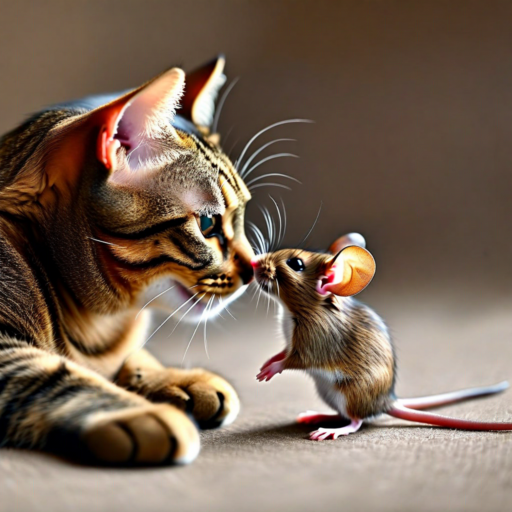

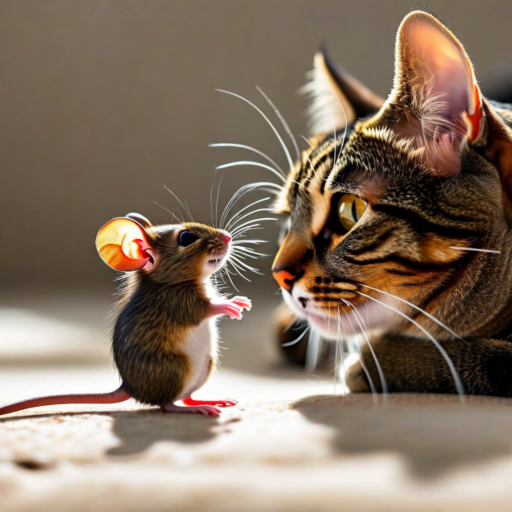

In [8]:
import boto3
from botocore.exceptions import ClientError
import json
from PIL import Image
from io import BytesIO

# S3 functions
def create_s3_bucket(bucket_name, region='YOUR REGION HERE'):
    s3_client = boto3.client('s3', region_name=region)
    try:
        if region == 'us-east-1':
            s3_client.create_bucket(Bucket=bucket_name)
        else:
            location = {'LocationConstraint': region}
            s3_client.create_bucket(Bucket=bucket_name, CreateBucketConfiguration=location)
        print(f"Bucket '{bucket_name}' created successfully in region '{region}'.")
    except ClientError as e:
        print(f"Error creating bucket '{bucket_name}' in region '{region}': {e}")

def upload_images_to_s3(bucket_name, images, region='YOUR REGION HERE'):
    s3_client = boto3.client('s3', region_name=region)
    for i, image in enumerate(images):
        image_key = f"image_{i}.png"
        try:
            image_bytes = BytesIO()
            image.save(image_bytes, format='PNG')
            image_bytes = image_bytes.getvalue()
            s3_client.put_object(Bucket=bucket_name, Key=image_key, Body=image_bytes)
            print(f"Image '{image_key}' uploaded to S3 bucket '{bucket_name}' in region '{region}'.")
        except ClientError as e:
            print(f"Error uploading image '{image_key}' to S3 bucket '{bucket_name}' in region '{region}': {e}")

def display_images_from_s3(bucket_name, num_images, region='YOUR REGION HERE'):
    s3_client = boto3.client('s3', region_name=region)
    for i in range(num_images):
        image_key = f"image_{i}.png"
        try:
            s3_response = s3_client.get_object(Bucket=bucket_name, Key=image_key)
            image_data = s3_response['Body'].read()
            image = Image.open(BytesIO(image_data))
            image.show()
        except ClientError as e:
            print(f"Error retrieving image '{image_key}' from S3 bucket '{bucket_name}' in region '{region}': {e}")

def perform_s3_operations(bucket_name, images, region='YOUR REGION HERE'):
    create_s3_bucket(bucket_name, region)
    upload_images_to_s3(bucket_name, images, region)
    display_images_from_s3(bucket_name, len(images), region)

# Call the perform_s3_operations function
bucket_name = 'vshkil-91377'
region = 'us-east-1'
perform_s3_operations(bucket_name, images, region)

<details>
    <summary>Task 2.4 solution</summary>

```python

import boto3
from botocore.exceptions import ClientError
import json
from PIL import Image
from io import BytesIO

# S3 functions
def create_s3_bucket(bucket_name, region='YOUR REGION HERE'):
    s3_client = boto3.client('s3', region_name=region)
    try:
        if region == 'us-east-1':
            s3_client.create_bucket(Bucket=bucket_name)
        else:
            location = {'LocationConstraint': region}
            s3_client.create_bucket(Bucket=bucket_name, CreateBucketConfiguration=location)
        print(f"Bucket '{bucket_name}' created successfully in region '{region}'.")
    except ClientError as e:
        print(f"Error creating bucket '{bucket_name}' in region '{region}': {e}")

def upload_images_to_s3(bucket_name, images, region='YOUR REGION HERE'):
    s3_client = boto3.client('s3', region_name=region)
    for i, image in enumerate(images):
        image_key = f"image_{i}.png"
        try:
            image_bytes = BytesIO()
            image.save(image_bytes, format='PNG')
            image_bytes = image_bytes.getvalue()
            s3_client.put_object(Bucket=bucket_name, Key=image_key, Body=image_bytes)
            print(f"Image '{image_key}' uploaded to S3 bucket '{bucket_name}' in region '{region}'.")
        except ClientError as e:
            print(f"Error uploading image '{image_key}' to S3 bucket '{bucket_name}' in region '{region}': {e}")

def display_images_from_s3(bucket_name, num_images, region='YOUR REGION HERE'):
    s3_client = boto3.client('s3', region_name=region)
    for i in range(num_images):
        image_key = f"image_{i}.png"
        try:
            s3_response = s3_client.get_object(Bucket=bucket_name, Key=image_key)
            image_data = s3_response['Body'].read()
            image = Image.open(BytesIO(image_data))
            image.show()
        except ClientError as e:
            print(f"Error retrieving image '{image_key}' from S3 bucket '{bucket_name}' in region '{region}': {e}")

def perform_s3_operations(bucket_name, images, region='YOUR REGION HERE'):
    create_s3_bucket(bucket_name, region)
    upload_images_to_s3(bucket_name, images, region)
    display_images_from_s3(bucket_name, len(images), region)

# Call the perform_s3_operations function
bucket_name = 'UNIQUE-BUCKET-NAME-HERE'
region = 'YOUR REGION HERE'
perform_s3_operations(bucket_name, images, region)
```

</details>

<details>
    <summary>Task 2.4 summary of the solution code</summary>

This code block provides utility functions for creating an Amazon S3 bucket, uploading images to the bucket, and retrieving and displaying those images from the bucket. The `perform_s3_operations` function is called with the appropriate arguments to perform these operations in the specified AWS Region.

</details>

#### Summary of Task 2

In this task, you created code to generate images using the Amazon Nova Canvas model, decoded the base64-encoded image strings into PIL.Image objects, and then uploaded those images to an Amazon S3 bucket. The uploaded images were retrieved from the S3 bucket and displayed using the Python Imaging Library.

## Task 3: Detect objects with Amazon Rekognition

In this task, you will create a script that uses Amazon Rekognition to make sure nothing unintended is created in the images that Titan Generator creates. The script will use the Amazon Rekognition service to detect and label the previously created images in the objects. It must also print the detected labels and their confidence scores for each image, providing a way to analyze and understand the content of the generated images.

Here are the instructions for code creation.

**Import the required libraries:** The code requires the boto3 library and the BytesIO module from the io library to handle image bytes.

**Create an Amazon Rekognition client:** Create an Amazon Rekognition client using the boto3.client function, passing in `'rekognition'` as the service name and the desired AWS Region as the `region_name` parameter.

**Iterate over a list of images:** The code should assume that there is a list of `images (images)` available, and it will iterate over each image using a for loop with an enumerate function to get the index and the image object.

**Save the image to a file:** Save the current image to a file with a specific naming convention `generated_image_1.png` using the `img.save` method.

**Convert the image to bytes:** Create a `BytesIO` object and save the image to it using the `img.save` method with the `format='PNG'` parameter. You must get the byte array from the BytesIO object using the `getvalue` method.

**Call the Amazon Rekognition service:** You must call the `detect_labels` method of the Amazon Rekognition client, passing in the image bytes as the Image parameter and specifying the maximum number of labels `MaxLabels=10` to return using the MaxLabels parameter.

**Print the detected labels:** Iterate over the Labels list in the Amazon Rekognition response, and print the name and confidence score of each label.

**Print a newline:** Print an empty line ("\n") after processing each image for better readability.


In [10]:
rekognition = boto3.client('rekognition', region_name='us-east-1')

for idx, img in enumerate(images):
    file_name = f"generated_image_{idx+1}.png"
    img.save(file_name)
    print(f"Image saved as {file_name}")
    
    # Convert image to bytes for Amazon Rekognition
    img_byte_arr = BytesIO()
    img.save(img_byte_arr, format='PNG')
    img_byte_arr = img_byte_arr.getvalue()

    # Call Amazon Rekognition
    rekognition_response = rekognition.detect_labels(
        Image={'Bytes': img_byte_arr},
        MaxLabels=10
    )

    # Print Amazon Rekognition labels
    print(f"Labels for {file_name}:")
    for label in rekognition_response['Labels']:
        print(f"{label['Name']} - {label['Confidence']:.2f}%")

    print("\n")


Image saved as generated_image_1.png
Labels for generated_image_1.png:
Animal - 98.74%
Mammal - 98.74%
Rat - 98.74%
Rodent - 98.74%
Pet - 87.31%
Cat - 85.17%
Kitten - 74.07%
Electronics - 57.01%
Hardware - 57.01%
Abyssinian - 56.61%


Image saved as generated_image_2.png
Labels for generated_image_2.png:
Animal - 96.15%
Mammal - 96.15%
Rat - 96.15%
Rodent - 96.15%
Pet - 89.77%
Cat - 87.96%
Kitten - 77.88%
Abyssinian - 56.71%
Hardware - 55.86%
Mouse - 55.86%




<details>
    <summary>Task 3 solution</summary>

```python

rekognition = boto3.client('rekognition', region_name='YOUR REGION HERE')

for idx, img in enumerate(images):
    file_name = f"generated_image_{idx+1}.png"
    img.save(file_name)
    print(f"Image saved as {file_name}")
    
    # Convert image to bytes for Amazon Rekognition
    img_byte_arr = BytesIO()
    img.save(img_byte_arr, format='PNG')
    img_byte_arr = img_byte_arr.getvalue()

    # Call Amazon Rekognition
    rekognition_response = rekognition.detect_labels(
        Image={'Bytes': img_byte_arr},
        MaxLabels=10
    )

    # Print Amazon Rekognition labels
    print(f"Labels for {file_name}:")
    for label in rekognition_response['Labels']:
        print(f"{label['Name']} - {label['Confidence']:.2f}%")

    print("\n")
```

</details>

<details>
    <summary>Task 3 summary of the solution code</summary>
    
This kind of analysis can be useful in various scenarios, such as validating the quality and accuracy of generated images, understanding the types of objects the image generation model is capable of producing, or potentially using the label information for further processing or decision-making.

</details>

You completed the **Using AWS SDK for Python with Amazon Bedrock** lab. In this lab, you used the Amazon Bedrock Runtime service to generate text and images using the Amazon Nova Lite and Nova Canvas models. You invoked these models with specific prompts and configurations, processed the generated content (text or base64-encoded images), and performed additional tasks, like uploading the generated images to an Amazon S3 bucket. You then retrieved the images from the bucket and displayed them using the Python Imaging Library. This functionality can be valuable for validating the quality and capabilities of models, as well as enabling further processing or decision-making based on the generated content.

### Cleanup

You completed this notebook. To move to the next part of the lab, complete the following steps:

1. Close this notebook file.

1. Return to the lab session and continue with the **Conclusion**.